<a href="https://colab.research.google.com/github/Jhincapieu/Prueba-convocatoria/blob/main/Ejercicio%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


4. Resolver el siguiente ejercicio en GoogleColab con el módulo de optimización de la librería scipy utilizando al menos dos solvers diferentes y comparando las respuestas generadas por cada uno de ellos (el cálculo de las diferencias debe ser realizado de manera automática por el código). El archivo generado debe ser compartido con permisos de edición con mi cuenta gawad@unal.edu.co y, además, enviado al repositorio creado en el numeral 2.

Minimizar 3*x + 8*y

sujeto a:

x + y >= 50

x - y <= 20

x >= 0

y >= 0


Siendo x, y números enteros.

Vamos a usar los métodos que incluye la librería de scipy y que son compatibles con programación lineal entera mixta para que podamos cumplir la condicion de que x, y sean números enteros

Según la documentación de esta librería estos son los solvers que tenemos disponibles y que funcionarían en nuestro caso:

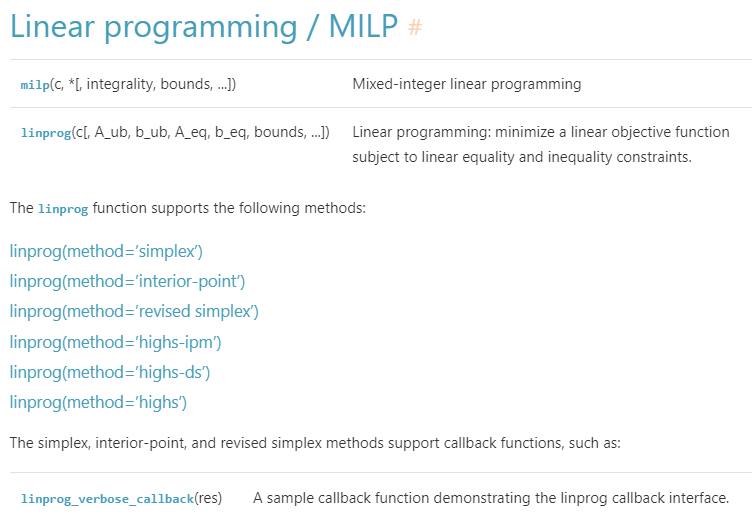

Vamos a usar los métodos Simplex y el método Highs

Notas:

1)  Debemos hacer cambios en las restricciones, es decir, debemos lograr que las variables queden en el lado menor de la desigualdad para que sea más fácil ingresarlo al código

      Restricciones:
          - x - y <= 50
          x - y <= 20

2)  Si quisieramos maximizar la función tendríamos que cambiar los signos de la función objetivo ya que nuestro código minimiza la función

In [5]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo
c = ([3, 8])

# Coeficientes de las restricciones (lado izquierdo de las desigualdades)
A = ([[-1, -1], [1, -1]])
b = ([-50, 20])

# Definir los límites para las variables (x y y son enteros, por lo que usamos la tupla)
bounds = ((0, None), (0, None))

# Resolver usando el solver "simplex"
result_simplex = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex',integrality=1)
x_simplex, y_simplex = result_simplex.x
min_value_simplex = result_simplex.fun

# Resolver usando el solver "highs"
result_highs = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs',integrality=1)
x_highs, y_highs = result_highs.x
min_value_highs = result_highs.fun

# Comparar las respuestas
print("Resultado del solver 'simplex':")
print(f"x = {x_simplex}, y = {y_simplex}, valor mínimo = {min_value_simplex}")

print('---')

print("\nResultado del solver 'highs':")
print(f"x = {x_highs}, y = {y_highs}, valor mínimo = {min_value_highs}")

print('---')


#Diferencia

diferencias=abs(min_value_highs-min_value_simplex)

print (f"Diferencias entre los valores optimos: {diferencias}\n\n")

print('---')

Resultado del solver 'simplex':
x = 35.0, y = 15.0, valor mínimo = 225.0
---

Resultado del solver 'highs':
x = 35.0, y = 15.0, valor mínimo = 225.0
---
Diferencias entre los valores optimos: 0.0


---


<ipython-input-5-68a33c08e828>:14: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result_simplex = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex',integrality=1)
